<a href="https://colab.research.google.com/github/Ananya-AJ/CMPE255-Data-Mining/blob/main/Assignment2-pycaret-gradio/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret --user

!pip install Jinja2==2.11.3
!pip install markupsafe==2.0.1

In [ ]:
!pip install pandas
!pip install kaggle
!pip install -q gradio

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d deepu1109/star-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/3.16k [00:00<?, ?B/s]
100% 3.16k/3.16k [00:00<00:00, 2.95MB/s]


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.classification import *
import pandas as pd
import numpy as np

In [ ]:
!unzip star-dataset.zip

Archive:  star-dataset.zip
  inflating: 6 class csv.csv         


In [ ]:
df = pd.read_csv("/content/stars.csv")
df.dtypes
df.shape
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (216, 7)
Unseen Data For Predictions: (24, 7)


In [ ]:
df.head


<bound method NDFrame.head of      Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400       0.17000                  16.120   
1               3042          0.000500       0.15420                  16.600   
2               2600          0.000300       0.10200                  18.700   
3               2800          0.000200       0.16000                  16.650   
4               1939          0.000138       0.10300                  20.060   
5               2840          0.000650       0.11000                  16.980   
6               2637          0.000730       0.12700                  17.220   
7               2600          0.000400       0.09600                  17.400   
8               2650          0.000690       0.11000                  17.450   
9               2700          0.000180       0.13000                  16.050   
10              3600          0.002900       0.51000                  10.690   
11        

In [ ]:
df.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


In [ ]:
df1 = pd.get_dummies(df)
df1.isnull().sum()
df1.info()

In [ ]:
s = setup(data = data, target = "Spectral Class", imputation_type = "iterative")

,Description,Value
0,session_id,3680
1,Target,Spectral Class
2,Target Type,Multiclass
3,Label Encoded,"A: 0, B: 1, F: 2, G: 3, K: 4, M: 5, O: 6"
4,Original Data,"(216, 7)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Spectral Class',
                                      time_features=[])),
                ('imputer',
                 Iterative_Imputer(add_indicator=False,
                                   classifier=LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                                             colsample...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough')

In [ ]:
models = compare_models()

In [ ]:
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9375,1.0,0.7143,0.9375,0.9375,0.9144,0.9194
1,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9333,0.0,0.9333,0.9500,0.9314,0.9038,0.9097
4,0.9333,0.0,0.9000,0.9500,0.9270,0.9045,0.9103
5,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8667,0.0,0.6250,0.8889,0.8686,0.8089,0.8194
7,0.6667,0.0,0.4444,0.7095,0.6613,0.5455,0.5562
8,0.9333,0.0,0.8333,0.8889,0.9067,0.9112,0.9167


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3680, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


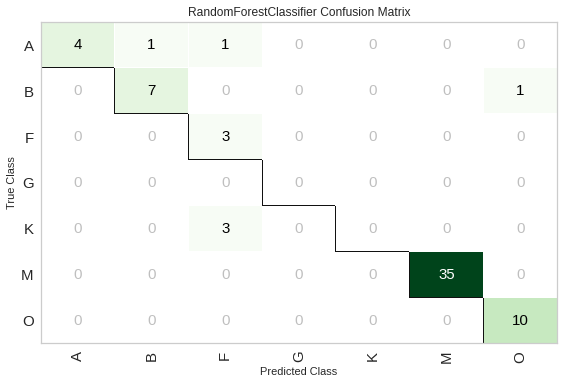

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rf,plot = "confusion_matrix")

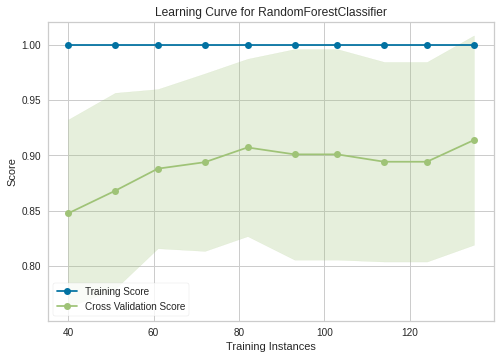

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rf,plot = "learning")

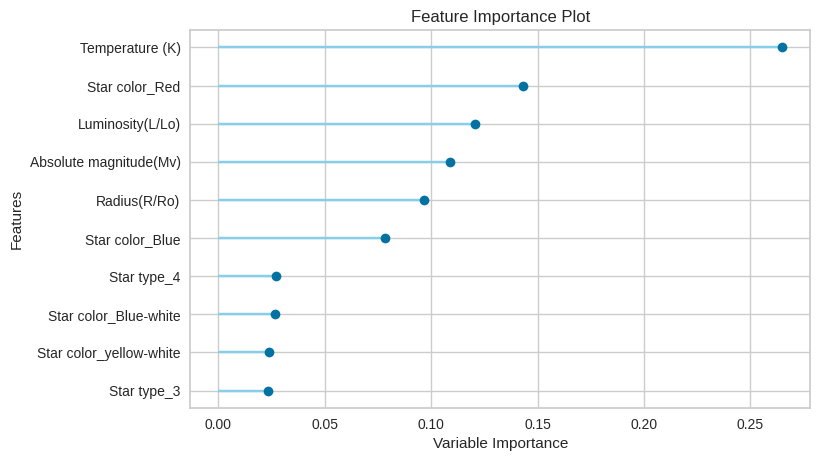

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rf, plot = "feature")

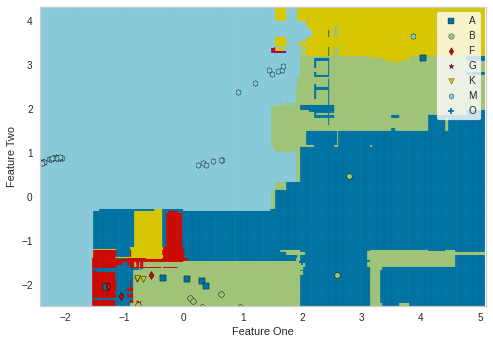

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rf, plot = "boundary")

In [ ]:
tuned_rf = tune_model(rf)
print(tuned_rf)

K-neigbor classifier

In [ ]:
import numpy as np
knn = create_model('knn')
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8846,0.6111,0.7375,0.7656,0.7363,0.7492
1,0.9333,0.0000,0.9333,0.9417,0.9289,0.9013,0.9078
2,0.6667,0.0000,0.4381,0.6667,0.6667,0.5192,0.5192
3,0.7333,0.0000,0.4667,0.6296,0.6750,0.5833,0.5991
4,0.8000,0.0000,0.7000,0.7250,0.7403,0.7059,0.7262
5,0.8667,0.0000,0.7714,0.8533,0.8474,0.8125,0.8280
6,0.8667,0.0000,0.7500,0.8667,0.8508,0.8065,0.8224
7,0.6667,0.0000,0.6389,0.7333,0.6756,0.5787,0.5955
8,0.8000,0.0000,0.6944,0.7762,0.7737,0.7305,0.7397


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


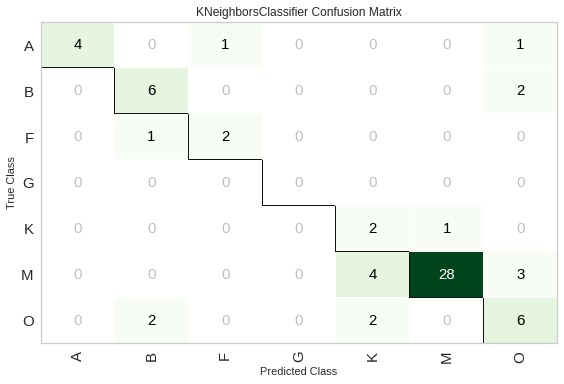

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

deploy knn model

In [ ]:
final_knn = finalize_model(tuned_knn)
print(final_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_ta

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')


predict on unseen data

In [ ]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0,0,0,0,0,0,0


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Label,Score
0,2840,0.00065,0.1100,16.98,0,Red,M,M,1.0
1,25000,0.05600,0.0084,10.58,2,Blue White,B,B,1.0
2,8500,0.00050,0.0100,14.50,2,White,A,A,1.0
3,39000,204000.00000,10.6000,-4.70,3,Blue,O,O,1.0
4,3834,272000.00000,1183.0000,-9.20,5,Red,M,M,1.0


In [ ]:
save_model(final_knn,'Final KNN Model 06sep2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform'), model_name=Final KNN Model 06sep2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Spectral Class',
                                      time_features=[])),
                ('imputer',
                 Iterative_Imputer(add_indicator=False,
                                   classifier=LGBMClassifier(boosting_type='gbdt',
                                           

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Spectral Class',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type='gbdt',
                                                              class_weight=None,
                                                              colsample...
                 ('fix_perfect', Remove_100(target='Spectral Class')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthroug

new prediction

In [ ]:
saved_final_knn = load_model('Final KNN Model 06sep2022')
new_prediction = predict_model(saved_final_knn, data=data_unseen)
new_prediction.head()

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final KNN Model 06sep2022, platform=None, authentication=None, verbose=True)
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Spectral Class',
                                      time_features=[])),
                ('imputer',
                 Iterative_Imputer(add_indicator=False,
                                   classifier=LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                           

Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0,0,0,0,0,0,0


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Label,Score
0,2840,0.00065,0.1100,16.98,0,Red,M,M,1.0
1,25000,0.05600,0.0084,10.58,2,Blue White,B,B,1.0
2,8500,0.00050,0.0100,14.50,2,White,A,A,1.0
3,39000,204000.00000,10.6000,-4.70,3,Blue,O,O,1.0
4,3834,272000.00000,1183.0000,-9.20,5,Red,M,M,1.0
